# Análise Exploratória dos Dados

## Setup

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from shutil import copy2
from IPython.core.pylabtools import figsize
from yellowbrick.regressor import CooksDistance

figsize(12, 8)

In [2]:
# Read file
path = "./Normalized/"
name = "acidez"
filename = name + ".csv"
df = pd.read_csv(path + filename, encoding='utf8')
df.head()

,DATA,acidez,ENTIDADE
0,2013-01-09,77.0,Reator
1,2013-02-14,84.2,Reator
2,2013-03-06,51.9,Reator
3,2013-04-03,72.0,Reator
4,2013-05-08,66.5,Reator


In [3]:
# Transformations
df[name] = df[name].map(lambda x: str(x).replace("*", ""))
df[name] = df[name].astype("float64")
df["DATA"] =  pd.to_datetime(df["DATA"], format="%Y-%m-%d")
df["YEAR"] = df["DATA"].map(lambda x: x.year)
df.dtypes

DATA        datetime64[ns]
acidez             float64
ENTIDADE            object
YEAR                 int64
dtype: object

## Verificando a Distribuição dos Valores

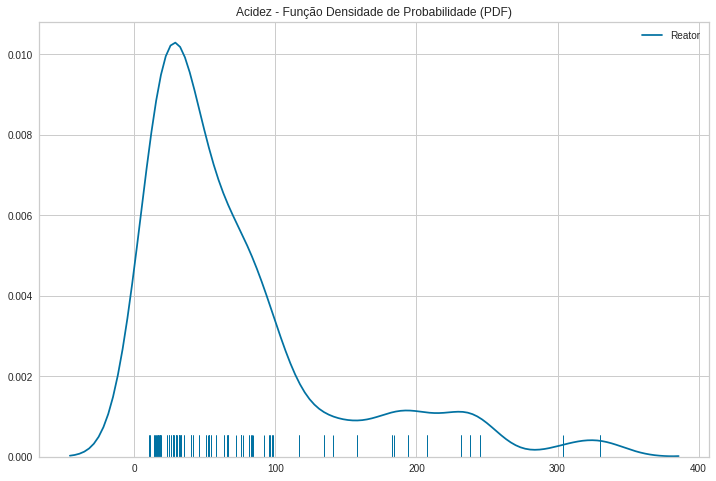

In [11]:
entity_names = df.ENTIDADE.unique().tolist()
entities = [df.loc[df['ENTIDADE'] == entity_name] for entity_name in entity_names]

for entity in entities:
    sns.distplot(entity[[name]].dropna(), hist=False, rug=True, label=str(entity['ENTIDADE'].unique()[0]))
plt.title(f"{name.capitalize()} - Função Densidade de Probabilidade (PDF)");

## Série Histórica

<Figure size 1080x576 with 0 Axes>

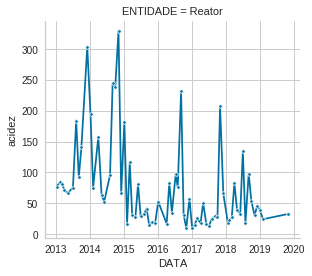

In [13]:
plt.figure(figsize=(15, 8))
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=4, dropna=True);
g = g.map(sns.lineplot, "DATA", name, marker=".", palette="Set2");

# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)

## Localizando outliers

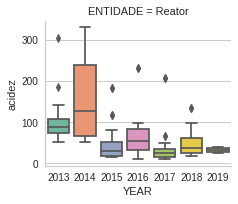

In [10]:
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=3, dropna=True);
g = g.map(sns.boxplot, "YEAR", name, palette="Set2")

In [8]:
# df.to_csv(f"./Normalized/{name}.csv", encoding='utf8', index=False)
copy2("EDA.ipynb", f"./EDA/EDA_{name}.ipynb")

'./EDA/EDA_sólidos.ipynb'